# Multi linear model

Single shot multi linear model

In [1]:
import time

import pandas as pd
import tensorflow as tf

import utils

## Dataset

In [2]:
case_1 = pd.read_csv("../datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("../datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("../datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("../datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("../datasets/case_5.csv", index_col='Time')

In [3]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]

In [4]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [5]:
PLOT_COL = "outlet_70"

## Model creation

In [6]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
BATCH_SIZE = 32

features_size = len(label_columns)

print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 1min 30s of data to predict 1min 30s into de future.


In [7]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    # tf.keras.layers.Dense(10, activation='relu'),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-16 21:06:50.654810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-16 21:06:50.654928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
multi_linear_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

In [9]:
exec_times = {}

In [10]:
results = {}

## Case 2

In [11]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_2'] = time.time() - start_t

2022-10-16 21:06:51.211643: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-16 21:06:51.552237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-16 21:06:52.002481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
window.train.element_spec

(TensorSpec(shape=(None, 18, 272), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 18, 135), dtype=tf.float32, name=None))

In [13]:
multi_linear_model.build(input_shape=window.example[0].shape)
print(multi_linear_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 272)            0         
                                                                 
 dense (Dense)               (None, 1, 2430)           663390    
                                                                 
 reshape (Reshape)           (None, 18, 135)           0         
                                                                 
Total params: 663,390
Trainable params: 663,390
Non-trainable params: 0
_________________________________________________________________
None


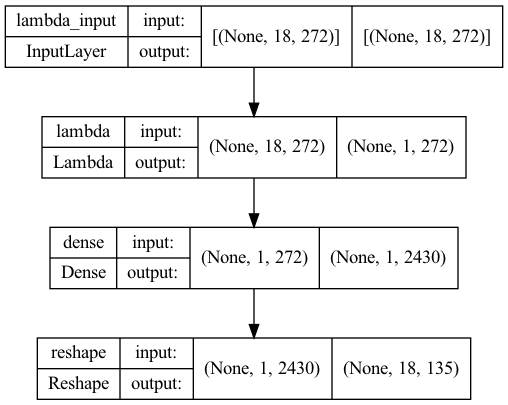

In [14]:
tf.keras.utils.plot_model(multi_linear_model, "../plots/models/multi_lineal.png", show_shapes=True)

label_col_index 69
label_col_index 69
label_col_index 69


2022-10-16 21:06:58.625176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


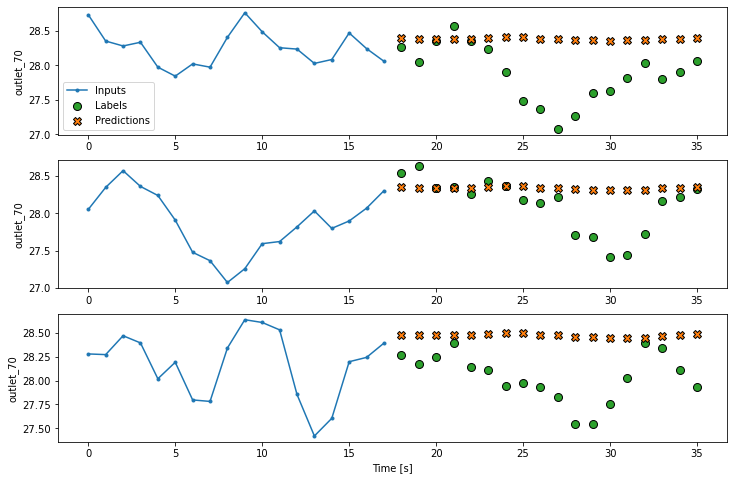

In [15]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

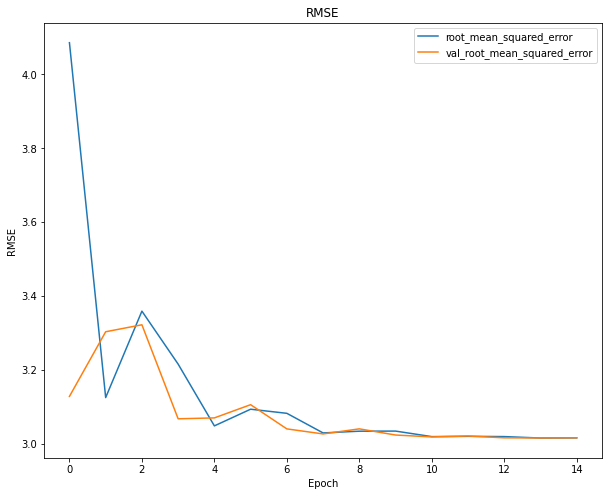

In [16]:
utils.plot_losses(history=history)

In [17]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [18]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_3'] = time.time() - start_t

label_col_index 69
label_col_index 69
label_col_index 69


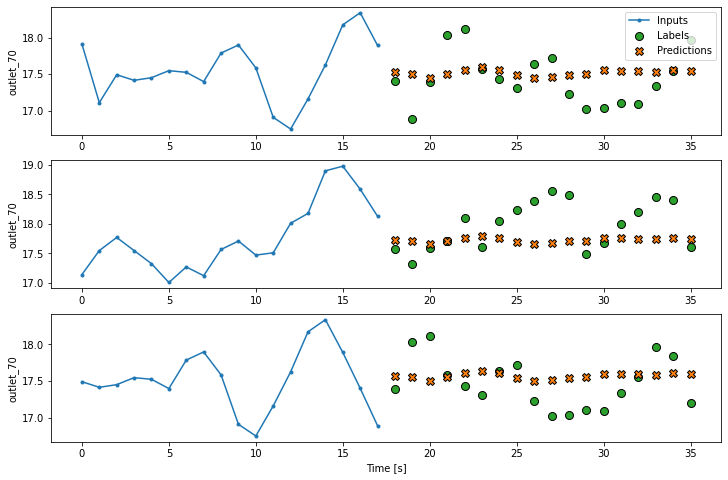

In [19]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

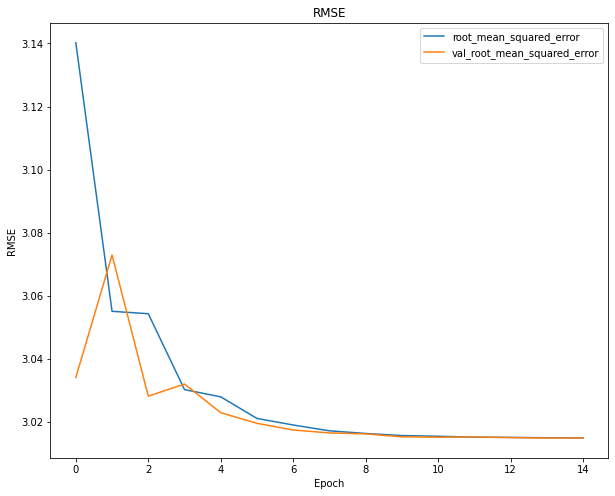

In [20]:
utils.plot_losses(history=history)

In [21]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [22]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)
exec_times['case_4'] = time.time() - start_t

label_col_index 69
label_col_index 69
label_col_index 69


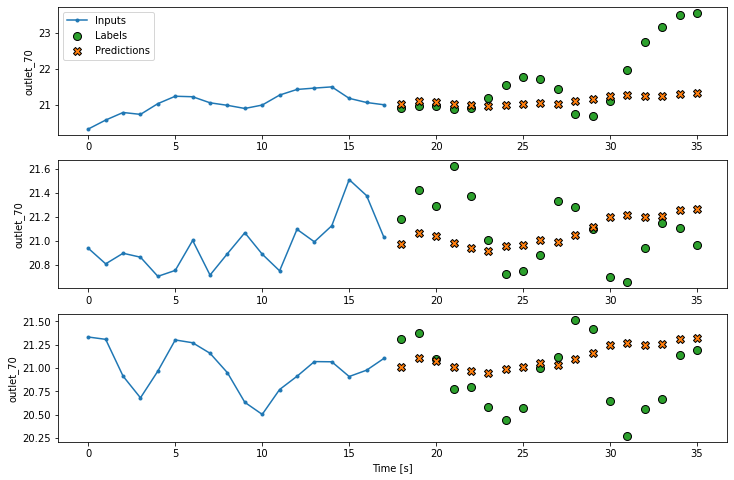

In [23]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

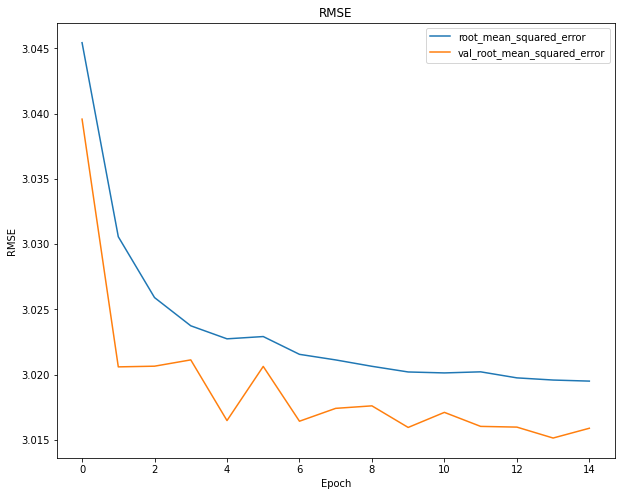

In [24]:
utils.plot_losses(history=history)

In [25]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [26]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_linear_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_5'] = time.time() - start_t

label_col_index 69
label_col_index 69
label_col_index 69


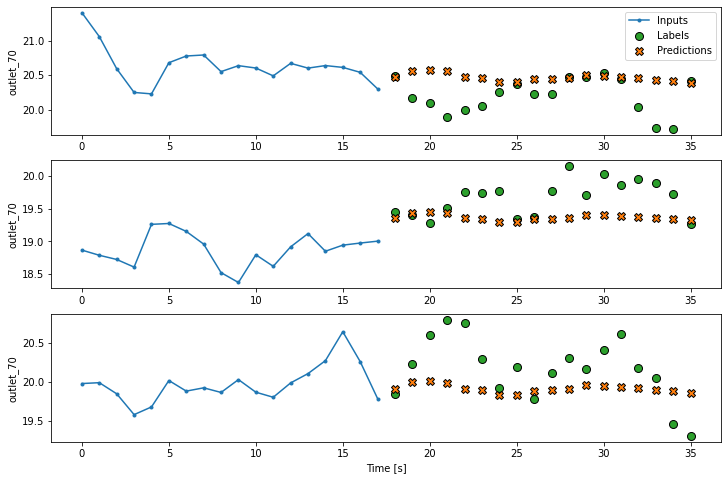

In [27]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

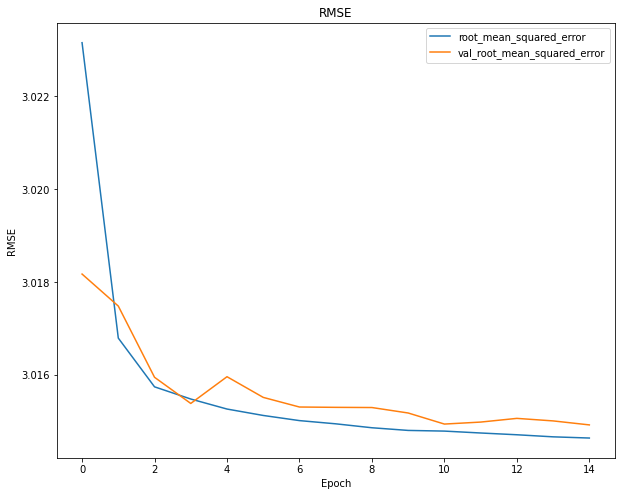

In [28]:
utils.plot_losses(history=history)

In [29]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [30]:
window = utils.WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_results = multi_linear_model.evaluate(window.train)

5/5 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1188


label_col_index 69
label_col_index 69
label_col_index 69


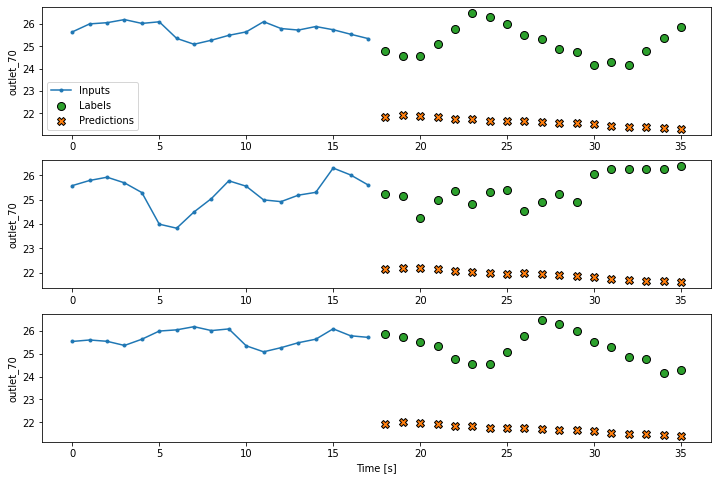

In [31]:
window.plot(multi_linear_model, plot_col=PLOT_COL)

## Results

In [32]:
results['test'] = {
    'loss': utils.inverse_transform(test_results[0]),
    'rmse': utils.inverse_transform_rmse(test_results[1])
}

In [33]:
pd.DataFrame(results).transpose().round(2)

,loss,rmse,val_loss,val_rmse
case_2,9.09,3.02,9.10,3.02
case_3,9.09,3.01,9.09,3.01
case_4,9.11,3.02,9.09,3.02
case_5,9.09,3.01,9.09,3.01
test,9.36,3.07,NaN,NaN


In [34]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time'])
exec_times_df.round(2)

,Time
case_2,6.84
case_3,6.61
case_4,7.08
case_5,7.89


In [35]:
total_t = exec_times_df['Time'].sum()
print("Total training time: %dmin %.2fs" % (total_t//60, total_t % 60))

Total training time: 0min 28.43s
